# Dyanahitha Project On Malaria cells Image Classification

# CSE-221710305032-M.Sai Srinivas

In [ ]:
#Installing Kaggle package to download Dataset from kaggle
!pip install kaggle

In [ ]:
#Here I'm uploading a file which has my kaggle credintials
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"saisrinivasm","key":"e400fa9ab6e61e60020b8d1dd3086388"}'}

In [ ]:
#Creating a kaggle directory in sample_data (~ means in sample_data) and Changing Directory to kaggle directory and linking to my kaggle account
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Downloading dataset from kaggle 
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

cell-images-for-detecting-malaria.zip: Skipping, found more recently modified local copy (use --force to force download)


<b>Probelm Statement:</b><br><br>
Create the model to train and test the classification of parasitized and uninfected Malaria Cells images 
<br><br>
<b>Datasets:</b><br><br>
The dataset is taken from the kaggle.<br>
The dataset contains 2 folders

*   Infected
*   Uninfected

And a total of 27,558 images.
<br><br>
<b>Uses:</b><br><br>
Save humans by detecting and deploying Image Cells that contain Malaria or not!

In [ ]:
#importing required packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
import matplotlib

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
print("numpy:",np.__version__)
print("seaborn:",sns.__version__)
print("matplotlib:",matplotlib.__version__)
print("tensorflow:",tf.__version__)

numpy: 1.18.5
seaborn: 0.10.1
matplotlib: 3.2.2
tensorflow: 2.2.0


In [ ]:
#importing os and zipfile packages and unzip the dataset downloaded from kaggle
import os
import zipfile
local_zip="/content/cell-images-for-detecting-malaria.zip"
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# Looking folders in the unziped folder i.e., In downloaded dataset
os.listdir('/content/cell_images/cell_images')

['Parasitized', 'Uninfected']

In [ ]:
# No. of images in Parasitized and Uninfected folders
print(len(os.listdir('/content/cell_images/cell_images/Uninfected')))
print(len(os.listdir('/content/cell_images/cell_images/Parasitized')))

13780
13780


In [ ]:
#Creating Variables for base directory , infected and uninfected folders
base_dir='/content/cell_images/cell_images'
infected='/content/cell_images/cell_images/Parasitized'
uninfected='/content/cell_images/cell_images/Uninfected'

In [ ]:
#Creating list of infected image file names
infected_filenames=os.listdir(infected)
infected_filenames[:4]

['C175P136NThinF_IMG_20151127_141253_cell_244.png',
 'C80P41ThinF_IMG_20150817_112557_cell_8.png',
 'C68P29N_ThinF_IMG_20150819_133236_cell_129.png',
 'C146P107ThinF_IMG_20151018_134554_cell_256.png']

In [ ]:
#Creating list of uninfected image file names
uninfected_filenames=os.listdir(uninfected)
uninfected_filenames[:4]

['C98P59ThinF_IMG_20150917_154235_cell_157.png',
 'C106P67ThinF_IMG_20150924_103636_cell_94.png',
 'C58P19thinF_IMG_20150802_122338_cell_21.png',
 'C125P86ThinF_IMG_20151004_102205_cell_102.png']

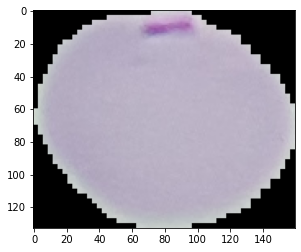

In [ ]:
#Displaying a image from infected image's
plt.imshow(plt.imread(os.path.join(infected,infected_filenames[0])))

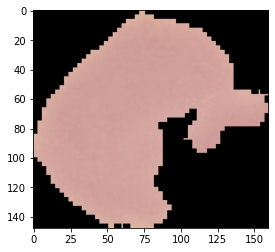

In [ ]:
#Displaying a image from uninfected image's
plt.imshow(plt.imread(os.path.join(uninfected,uninfected_filenames[0])))

In [ ]:
#ImageDataGenerator is imported and used for whole Uninfected and Parasitized data to create a data of all images and giving labels
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen=ImageDataGenerator(rescale=(1./255))

data=data_gen.flow_from_directory(base_dir,target_size=(50,50),batch_size=27560,class_mode='binary')

Found 27558 images belonging to 2 classes.


In [ ]:
img,labels=data.next()
print(img.shape)
print(labels.shape)

(27558, 50, 50, 3)
(27558,)


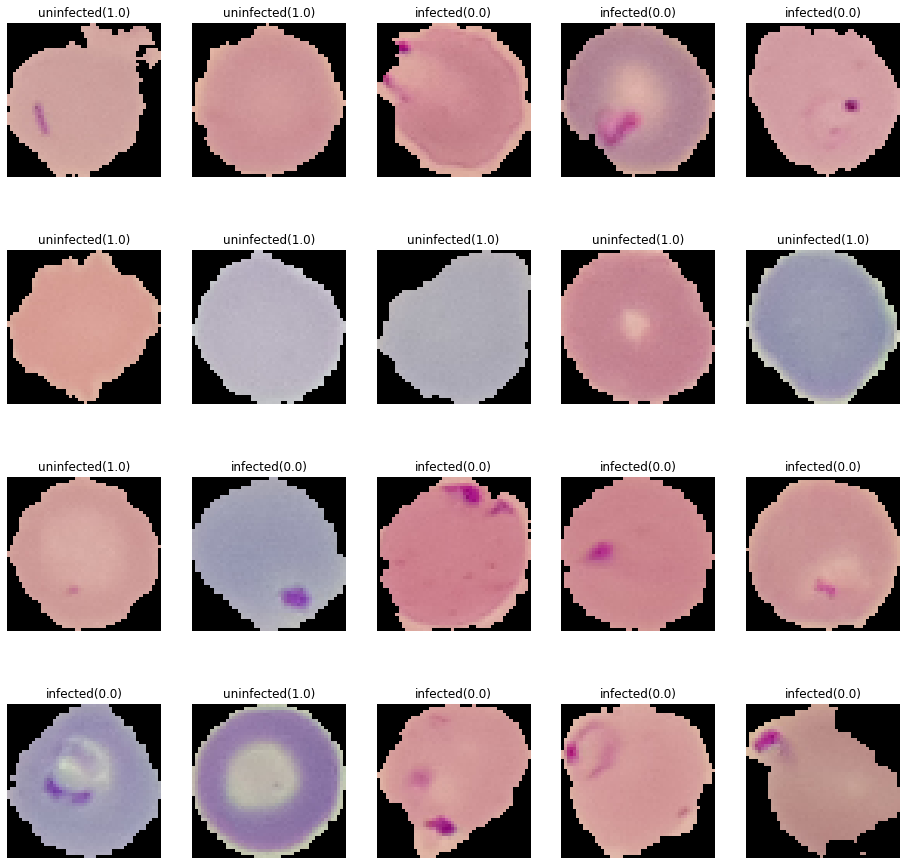

In [ ]:
#Displaying the images from data with its labels as title
plt.figure(figsize=(16,16))
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(img[i,:,:,:])
  plt.title('{}({})'.format("uninfected" if labels[i]==1.0 else "infected",labels[i]))
  plt.axis("off")


In Our Data
<br>Uninfected is labeled as 1.0
<br>Parasitized is labeled as 0.0

In [ ]:
#Splitting data into train,validation and test
from sklearn.model_selection import train_test_split

x_train,x,y_train,y=train_test_split(img,labels,test_size=0.2,random_state=32)

x_val,x_test,y_val,y_test=train_test_split(x,y,test_size=0.5,random_state=32)

In [ ]:
#shapes of train , validation and test data
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_val:",x_val.shape)
print("y_val",y_val.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)

x_train: (22046, 50, 50, 3)
y_train: (22046,)
x_val: (2756, 50, 50, 3)
y_val (2756,)
x_test: (2756, 50, 50, 3)
y_test: (2756,)


In [ ]:
#Creating a model of Sequential with 6 layers
model = tf.keras.models.Sequential([
    # First layer is Conv2D layer and it's Maxpooling2D 
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(50, 50, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Second layer is Conv2D layer and it's Maxpooling2D
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # THird layer is Conv2D layer and it's Maxpooling2D
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #A dropout value for Third layer
    tf.keras.layers.Dropout(0.2),
    # A Flat layer is the Fourth layer 
    tf.keras.layers.Flatten(),
    # Dense is Fifth layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Another Dense as Sixth Layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 128)         0

In [ ]:
#Compiling the model with 'binary_crossentropy' as loss , 'rmsprop' as optimizers and 'accuracy' as it's metric
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
#Created a class and with def which will stop after 50 epochs orelse if accuracy reaches 98.7%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.987 ):
            print("\nReached 98.7% accuracy so cancelling training!")
            self.model.stop_training = True 

In [23]:
#creating an object for MyCallback() class and asigning it in model.fit() for the callbacks attribute
callbacks=myCallback()
history = model.fit(x_train,y_train,batch_size = 80,epochs=50,validation_data=(x_val, y_val),callbacks = callbacks,verbose=1, shuffle=True)

Epoch 1/50
276/276 [==============================] - 84s 306ms/step - loss: 0.5071 - accuracy: 0.7320 - val_loss: 0.1999 - val_accuracy: 0.9285
Epoch 2/50
276/276 [==============================] - 83s 302ms/step - loss: 0.1828 - accuracy: 0.9388 - val_loss: 0.1799 - val_accuracy: 0.9383
Epoch 3/50
276/276 [==============================] - 84s 303ms/step - loss: 0.1498 - accuracy: 0.9525 - val_loss: 0.1451 - val_accuracy: 0.9521
Epoch 4/50
276/276 [==============================] - 83s 302ms/step - loss: 0.1398 - accuracy: 0.9560 - val_loss: 0.2101 - val_accuracy: 0.9115
Epoch 5/50
276/276 [==============================] - 84s 304ms/step - loss: 0.1320 - accuracy: 0.9567 - val_loss: 0.1182 - val_accuracy: 0.9586
Epoch 6/50
276/276 [==============================] - 84s 303ms/step - loss: 0.1278 - accuracy: 0.9575 - val_loss: 0.1405 - val_accuracy: 0.9572
Epoch 7/50
276/276 [==============================] - 84s 304ms/step - loss: 0.1218 - accuracy: 0.9586 - val_loss: 0.1278 - val_ac

In [24]:
# evaluate and print test accuracy
score = model.evaluate(x_test,y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9499274492263794


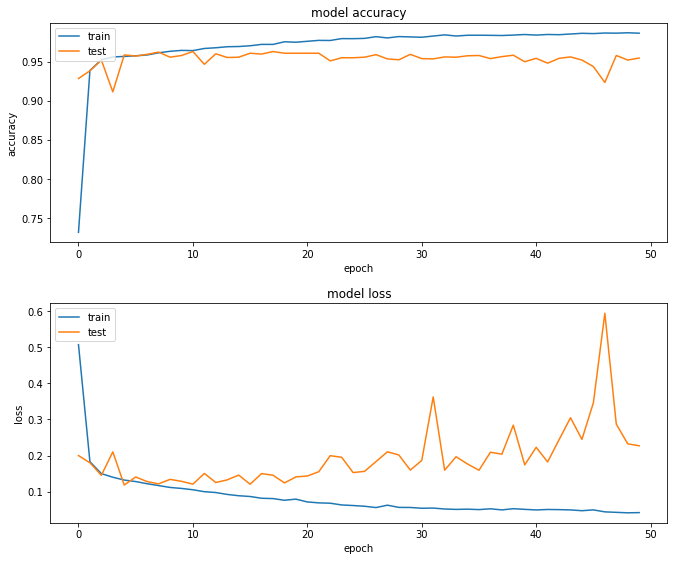

In [25]:
# summarize history for accuracy
plt.figure(figsize=(10,8))  
plt.subplot(2,1,1)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
plt.tight_layout(pad=3.0)

plt.subplot(2,1,2)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

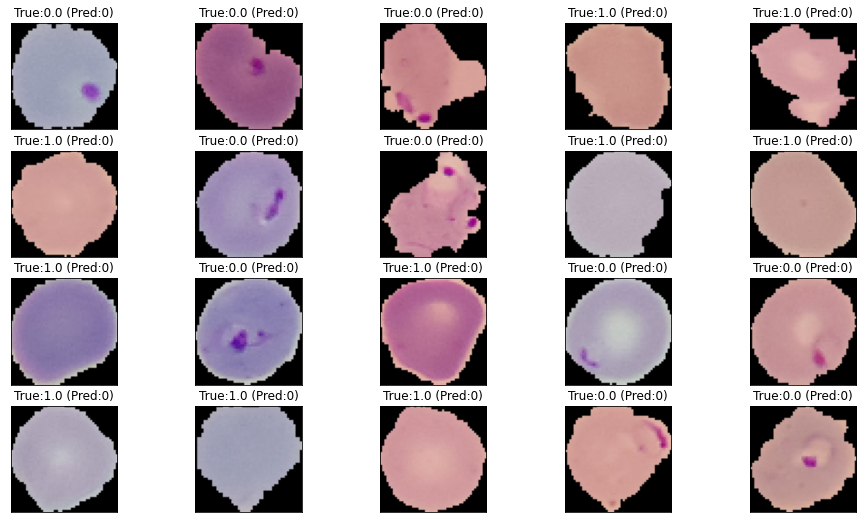

In [26]:
y_pred=model.predict(x_test)
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=20, replace=False)):
    ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = y_test[idx]
    ax.set_title("True:{} (Pred:{})".format(true_idx,pred_idx))

In Our Data
<br>Uninfected is labeled as 1.0
<br>Infected is labeled as 0.0

In [27]:
#choosing random image from Parasitized folder
import random
raw_image=random.choice(infected_filenames)
raw_image

'C39P4thinF_original_IMG_20150622_110435_cell_97.png'

In [28]:
#checking the original shape of Parasitized image
img_array=plt.imread(os.path.join(infected,raw_image))
img_array.shape

(94, 115, 3)

In [29]:
#resizing the Parasitized image
img_array.resize((50,50,3))
img_array.shape

(50, 50, 3)

In [30]:
#rescaling the Parasitized image and reshaping Parasitized image
img_array=img_array/255
img_array=img_array.reshape([1,50,50,3])

In [31]:
#Predicting the Parasitized image using the model
raw_pred=model.predict_classes(img_array)
print("predicted value",raw_pred[0,0])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
predicted value 0


In [32]:
#choosing random image from Uninfected folder
raw_image1=random.choice(uninfected_filenames)
raw_image1

'C140P101ThinF_IMG_20151005_205922_cell_54.png'

In [33]:
#checking the original shape of Uninfected image
img_array1=plt.imread(os.path.join(uninfected,raw_image1))
img_array1.shape

(142, 136, 3)

In [34]:
#resizing the Uninfected image
img_array1.resize((50,50,3))
img_array1.shape

(50, 50, 3)

In [35]:
#rescaling the Uninfected image and reshaping of Uninfected image
img_array1=img_array1/255
img_array1=img_array1.reshape([1,50,50,3])

In [36]:
#Predicting the Uninfected image using the model
raw_pred1=model.predict_classes(img_array1)
print("predicted value",raw_pred[0,0])

predicted value 0


<b>Conclusion:</b><br>
Malaria is a widespread disease that has claimed millions of lives all over the world. Automation of the diagnosis process will provide accurate diagnosis of the disease, which will benefit health-care to resource-scarce areas. We showed that the deep convolutional network based on conv2d was capable of achieving 98.7% on train data and 94.7% on test data